# What's the Weather Like?

## Analysis
#### Observed Trend 1: It is hotter at the equator; however, the northern hemisphere is currently warmer than the southern hemisphere

#### Observed Trend 2: The northern hemisphere appears to have some of the coldest temperatures as well which may be due in part to a higher concentration. More cities with greater temperature diversity.

#### Observed Trend 3: Humidity, Cloudiness, and Wind Speed are uniform across the northern and southern hemispheres. Humidity is high, wind is low and cloudiness is evenly dispersed across the board. 


In [1]:
# Dependencies

from citipy import citipy
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import random
import time
import matplotlib.pyplot as plt
import datetime
import csv
import os

In [2]:
# Save config information.
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb" #Amed's key
api_key = "924783bda048569443e49dd6a03e5591"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit 

# Generate Cities List

In [3]:
# grab random coordinates an find the closest cities
sample_size = 500

coordinates = [((random.randint(-90, 90)),(random.randint(-180, 180))) for _ in range (sample_size)]

city_list = []

cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    city_names = citipy.nearest_city(lat, lon).city_name

#create a list of random cities    
    city_list.append(city_names)

#city_list 

# Perform API Calls

In [4]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature

city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

counter = 0

#clear/ prep csv file for query log
output_path = os.path.join("Weather_Query_log")
with open(output_path, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')

for city in city_list:
    
    try:
        print("----------------------")
        print("Now logging city # " + str(counter))
        print(query_url + city)
        response = req.get(query_url + city).json()
        
        # Specify the file to write to
        output_path = os.path.join("Weather_Query_log")

        # Open the file using "write" mode. Specify the variable to hold the contents
        with open(output_path, 'a', newline='') as csvfile:

            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')

            # Write the first row (column headers)
            csvwriter.writerow(['----------------------'])
            csvwriter.writerow(["Now logging city # " + str(counter)])
            csvwriter.writerow([query_url + city]) 

            
        city_data.append(response.get("name"))
        cloudiness_data.append(response.get("clouds").get("all"))
        country_data.append(response.get("sys").get("country"))
        date_data.append(response.get("dt"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        max_temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))

        counter = counter + 1
        if counter % 59 == 0:
            time.sleep(60)
    except:
        print("Skipping this...")

weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

weather_data = pd.DataFrame(weather_data)

date_stamp = str(weather_data.iloc[0,3])

date_stamp = datetime.datetime.fromtimestamp(int(date_stamp)).strftime('%m-%d-%Y')

weather_data.count()

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=jamestown
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bredasdorp
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=busselton
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=jiwani
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=ushuaia
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hithadhoo
----------------------
Now logging city # 6
http://api.openwea

----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=subtanjalla
----------------------
Now logging city # 56
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hermanus
----------------------
Now logging city # 57
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=albany
----------------------
Now logging city # 58
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=avarua
----------------------
Now logging city # 59
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hobart
----------------------
Now logging city # 60
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=porto santo
----------------------
Now logging city # 61
http://api.op

----------------------
Now logging city # 107
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=amderma
----------------------
Now logging city # 108
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=vaini
----------------------
Now logging city # 109
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=san borja
----------------------
Now logging city # 110
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=georgetown
----------------------
Now logging city # 111
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mataura
----------------------
Now logging city # 112
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=saint george
----------------------
Now logging city # 113
http

----------------------
Now logging city # 159
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=leningradskiy
----------------------
Now logging city # 160
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kikwit
----------------------
Now logging city # 161
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=arlit
----------------------
Now logging city # 162
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=thompson
----------------------
Now logging city # 163
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=huaicheng
----------------------
Now logging city # 164
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=port elizabeth
----------------------
Now logging city # 165

----------------------
Now logging city # 211
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kawhia
----------------------
Now logging city # 212
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mount gambier
----------------------
Now logging city # 213
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=taolanaro
----------------------
Now logging city # 214
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=koupela
----------------------
Now logging city # 215
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=nouadhibou
----------------------
Now logging city # 216
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 217
ht

----------------------
Now logging city # 263
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mayo
----------------------
Now logging city # 264
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=gallup
----------------------
Now logging city # 265
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=port elizabeth
----------------------
Now logging city # 266
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mahebourg
----------------------
Now logging city # 267
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=awjilah
----------------------
Now logging city # 268
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=leningradskiy
----------------------
Now logging city # 269
h

----------------------
Now logging city # 315
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hithadhoo
----------------------
Now logging city # 316
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=yar-sale
----------------------
Now logging city # 317
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 318
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=namibe
----------------------
Now logging city # 319
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=faanui
----------------------
Now logging city # 320
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=cape town
----------------------
Now logging city # 321
http://ap

----------------------
Now logging city # 367
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=walvis bay
----------------------
Now logging city # 368
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=pevek
----------------------
Now logging city # 369
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=puerto ayora
----------------------
Now logging city # 370
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 371
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kribi
----------------------
Now logging city # 372
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=jamestown
----------------------
Now logging city # 373
http:/

----------------------
Now logging city # 421
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=attawapiskat
----------------------
Now logging city # 422
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=karamay
----------------------
Now logging city # 423
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=filadelfia
----------------------
Now logging city # 424
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=port elizabeth
----------------------
Now logging city # 425
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hasaki
----------------------
Now logging city # 426
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=port elizabeth
----------------------
Now logging ci

----------------------
Now logging city # 473
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kuytun
----------------------
Now logging city # 474
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 475
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=ushuaia
----------------------
Now logging city # 476
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=necochea
----------------------
Now logging city # 477
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=carnarvon
----------------------
Now logging city # 478
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=ushuaia
----------------------
Now logging city # 479
http://api

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1509152160,50,42.10,-79.24,57.20,11.41
1,Bredasdorp,0,ZA,1509152400,76,-34.53,20.04,50.00,5.82
2,Busselton,8,AU,1509153705,100,-33.65,115.33,63.94,24.94
3,Jiwani,0,PK,1509153706,96,25.05,61.74,68.21,2.75
4,Ushuaia,20,AR,1509148800,70,-54.80,-68.30,46.40,8.05


# Latitude vs Temperature Plot

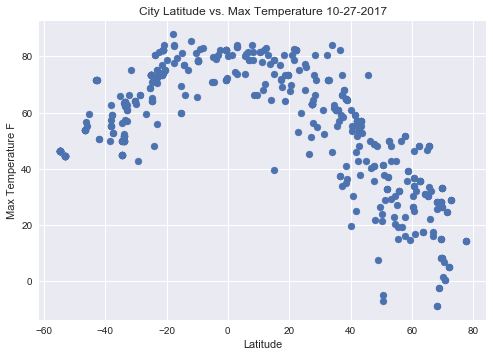

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Max Temperature F")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

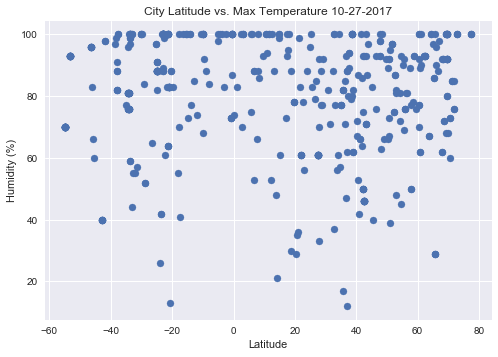

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

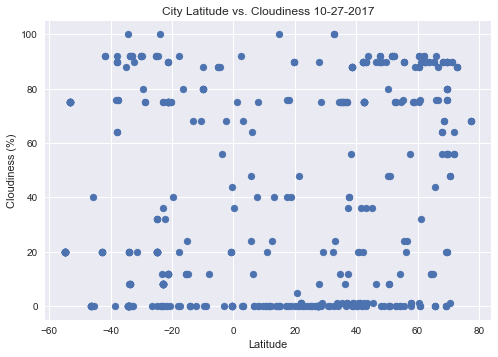

In [9]:
# Build a scatter plot for atitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " " + date_stamp)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

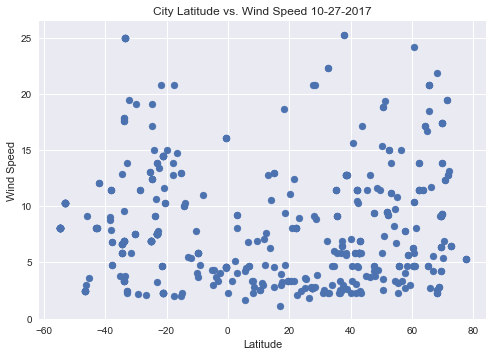

In [10]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " " + date_stamp)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

# Data Source Map

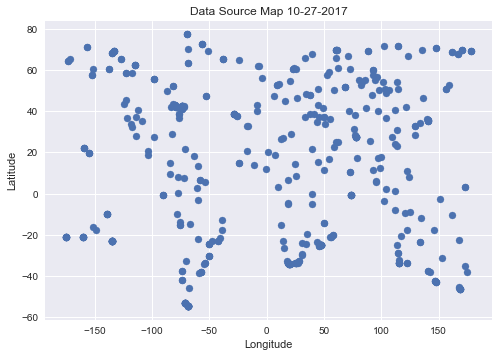

In [11]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lng"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Data Source Map" + " " + date_stamp)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("Data Source Map.png")

# Show plot
plt.show()